## For more: https://files.apertus.org/AXIOM-Beta/optimal_curve.html

In [1]:
read_noise = 4;              % 12-bit DN
full_well = 13500;           % electrons

In [2]:
function noise = noise_model(dn, read_noise, full_well)
    dn = min(max((dn-100), 1e-5), 3900);
    gain = full_well / 3900;
    electrons = dn * gain;
    shot_snr = sqrt(electrons);
    shot_noise = dn ./ shot_snr;
    noise = sqrt(read_noise.^2 + shot_noise.^2);
end

In [3]:
% helper to force the X range on the graphs
function xaxis(xr)
    a = axis;
    a(1:2) = xr;
    axis(a);
end

function xrange12()
    xaxis([0 4095]);
end

In [4]:
dn = 0:4095;
noise = noise_model(dn, read_noise, full_well);

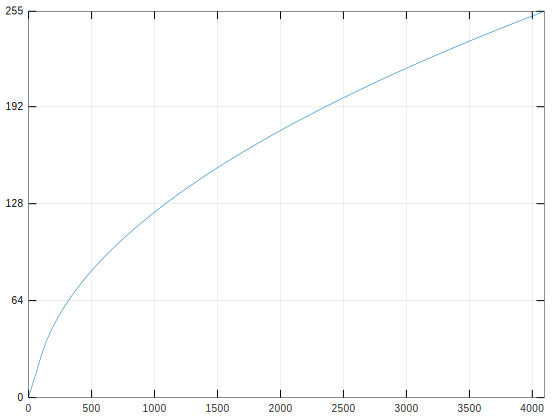

In [5]:
lut = cumsum(1./noise);
lut = lut * 255 / lut(end);
plot(dn, lut)
grid on
axis([0 4095 0 255]),
set(gca, 'ytick', [0 64 128 192 255])

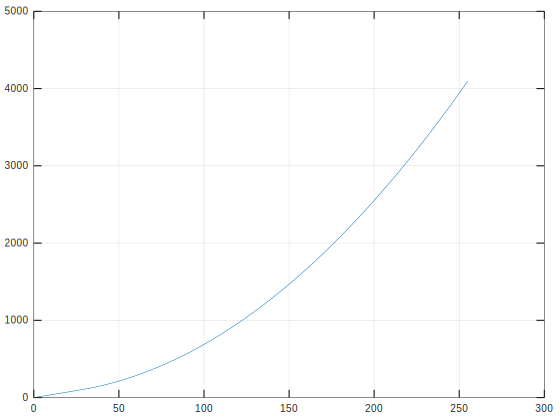

In [6]:
% reverse curve
rlut = interp1(lut, dn, 0:255);
rlut(1) = dn(1);
plot(0:255, rlut)
grid on

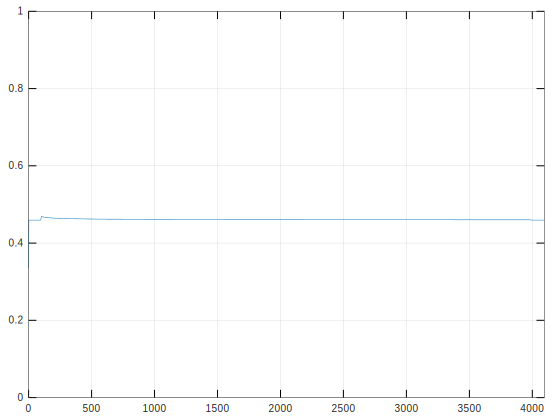

In [7]:
% quantization error: if we alter the 8-bit data by 0.5 (peak roundoff error), how much does the 12-bit data change?
qe = diff(rlut) / 2;
qe(end+1) = qe(end);
plot(rlut, qe ./ interp1(dn,noise,rlut));
axis([0 4095 0 1])
grid on

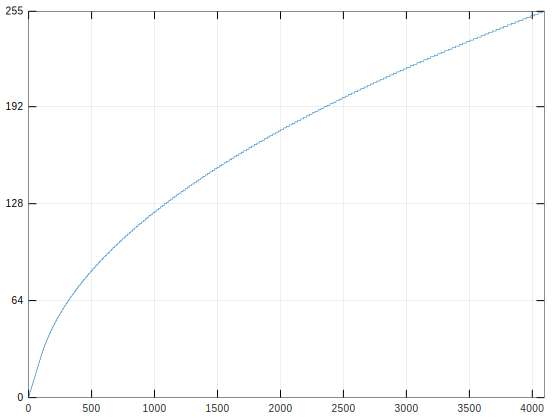

In [8]:
data_8bit = round(lut);
plot(dn, data_8bit)
axis([0 4095 0 255]),
set(gca, 'ytick', [0 64 128 192 255])
grid on

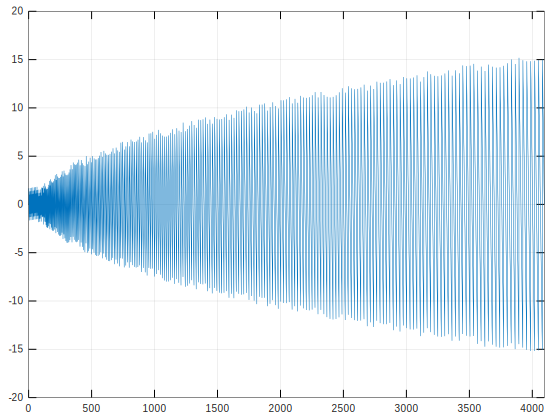

In [9]:
recovered_12bit = rlut(data_8bit+1);
qe = recovered_12bit - dn;
plot(dn, qe)
grid on
xrange12()

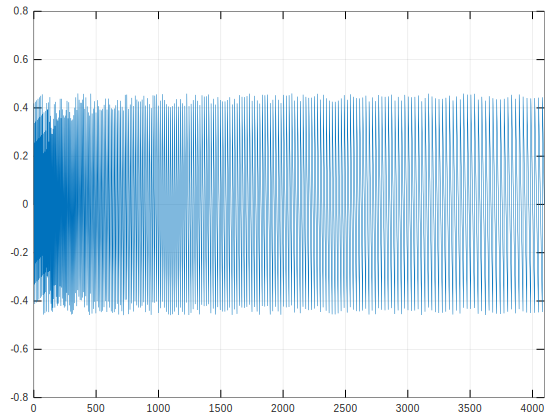

In [10]:
plot(dn, qe ./ noise)
xrange12()
grid on

In [11]:
dn = 0:4050;
noise = noise_model(dn, read_noise, full_well);
lut = cumsum(1./noise);
lut = lut * 255 / lut(end);
gamma_lut = @(x, gamma, gain, offset) min(max(((((x + offset) .* gain) / 4095) .^ gamma) * 255, 0), 255);

params =

    0.52115    1.02447  -21.74171



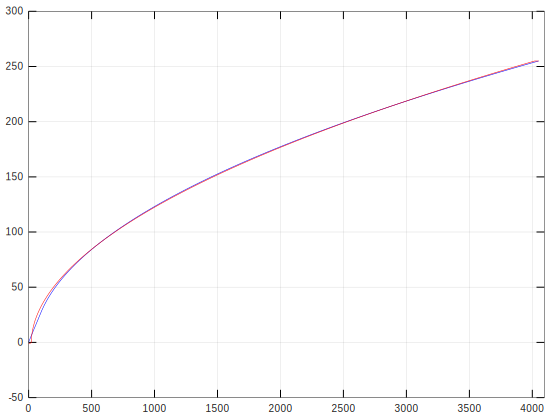

In [12]:
params = fminsearch(@(p) norm(lut - gamma_lut(dn, p(1), p(2), p(3))), [0.5 1 50])

plot(dn, lut, 'b', dn, gamma_lut(dn, params(1), params(2), params(3)), 'r'), grid on
xrange12()

In [13]:
params = [0.52115,    1.02447,  -21.74171];
plot(dn, gamma_lut(dn, params2(1), params2(2), params2(3)), 'b', dn, gamma_lut(dn, params(1), params(2), params(3)), 'r'), grid on, xaxis([-100 4095]);

error: 'params2' undefined near line 1 column 24


In [14]:
in = [20 25 50 100 500 1000 2000 3000 3800 3900 4000 4095];

round(gamma_lut(in, params(1), params(2), params(3)))

ans =

 Columns 1 through 5:

    -0 +   5i     6 +   0i    19 +   0i    33 +   0i    84 +   0i

 Columns 6 through 10:

   122 +   0i   177 +   0i   219 +   0i   248 +   0i   251 +   0i

 Columns 11 and 12:

   254 +   0i   255 +   0i

